In [1]:
# Import necessary libraries
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Q1

## Read 1.jpg image

In [2]:
image = cv2.imread('images/1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

array([[[241, 144, 189],
        [241, 139, 186],
        [245, 132, 184],
        ...,
        [147, 118, 140],
        [151, 125, 150],
        [156, 132, 158]],

       [[246, 147, 191],
        [247, 144, 191],
        [250, 138, 188],
        ...,
        [175, 156, 176],
        [176, 161, 184],
        [179, 165, 190]],

       [[250, 147, 190],
        [252, 145, 189],
        [255, 141, 192],
        ...,
        [184, 182, 203],
        [185, 187, 210],
        [188, 192, 217]],

       ...,

       [[233,  70,  71],
        [219,  45,  55],
        [211,  13,  48],
        ...,
        [199, 137,  50],
        [199, 129,  57],
        [178, 104,  39]],

       [[225,  59,  63],
        [218,  39,  58],
        [218,  12,  58],
        ...,
        [166, 107,  27],
        [168, 101,  33],
        [148,  78,  18]],

       [[227,  62,  66],
        [227,  48,  67],
        [233,  23,  70],
        ...,
        [142,  84,  11],
        [143,  79,  17],
        [128,  62,   4]]], dtype=uint8)
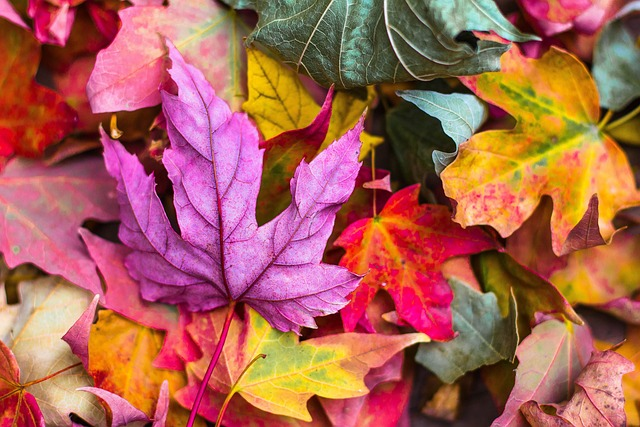

In [3]:
image

## Q1.1: RGB to CMYK & CMYK to RGB

In [4]:
def RGB_to_CMYK(r, g, b, RGB_SCALE = 255, CMYK_SCALE = 100):

  #############
  # Your code #
  #############
  # Convert RGB components to the range of 0 to 1
  r, g, b = r / RGB_SCALE, g / RGB_SCALE, b /RGB_SCALE
  # Black key calculation
  k = 1 - max(r, g, b)

  c, m, y = 0, 0, 0
  if k != 1:
    c = ((1 - r - k) / (1 - k)) *  CMYK_SCALE
    m = ((1 - g - k) / (1 - k)) *  CMYK_SCALE
    y = ((1 - b - k) / (1 - k)) *  CMYK_SCALE

  k = k * CMYK_SCALE

  return c, m, y, k

In [5]:
def CMYK_to_RGB(c, m, y, k, RGB_SCALE = 255, CMYK_SCALE = 100):

  #############
  # Your code #
  #############
  # Convert CMYK components to the range of 0 to 1
  c, m, y, k = c / CMYK_SCALE, m / CMYK_SCALE, y / CMYK_SCALE, k / CMYK_SCALE

  # RGB calculations
  r = round((1 - c) * (1 - k) *  RGB_SCALE)
  g = round((1 - m) * (1 - k) *  RGB_SCALE)
  b = round((1 - y) * (1 - k) *  RGB_SCALE)

  return r, g, b

In [8]:
# Testing the written functions
color_RGB = [255, 80, 170] # in RGB format
print("RGB form: ", color_RGB)

# change to CMYK format
color_CMYK = RGB_to_CMYK(color_RGB[0], color_RGB[1], color_RGB[2])
print("CMYK form: ", color_CMYK)

# back to RGB format from CMYK format
color_RGB_from_CMYK = CMYK_to_RGB(color_CMYK[0], color_CMYK[1], color_CMYK[2], color_CMYK[3])
print("RGB from CMYK: ", color_RGB_from_CMYK)

RGB form:  [255, 80, 170]
CMYK form:  (0.0, 68.62745098039215, 33.333333333333336, 0.0)
RGB from CMYK:  (255, 80, 170)


## Q1.2: RGB to HSI

In [9]:
import math
def RGB_to_HSI(r, g, b):

  #############
  # Your code #
  #############
  r, g, b = r / 255.0, g / 255.0, b / 255.0
  i = (r + g + b) / 3.0

  min_val = min(r, g, b)
  s = 1 - (3 / (r + g + b)) * min_val if (r + g + b) != 0 else 0

  # Hue calculation
  numerator = 0.5 * ((r - g) + (r - b))
  denominator = math.sqrt((r - g)**2 + (r - b) * (g - b))

  # Avoid division by zero and calculate theta
  theta = 0
  if denominator != 0:
      theta = math.acos(numerator / denominator) * (180 / math.pi)

  # Calculate the Hue value based on the theta value
  if b <= g:
      h = theta
  else:
      h = 360 - theta

  return h, s, i

## Show result image for all functions

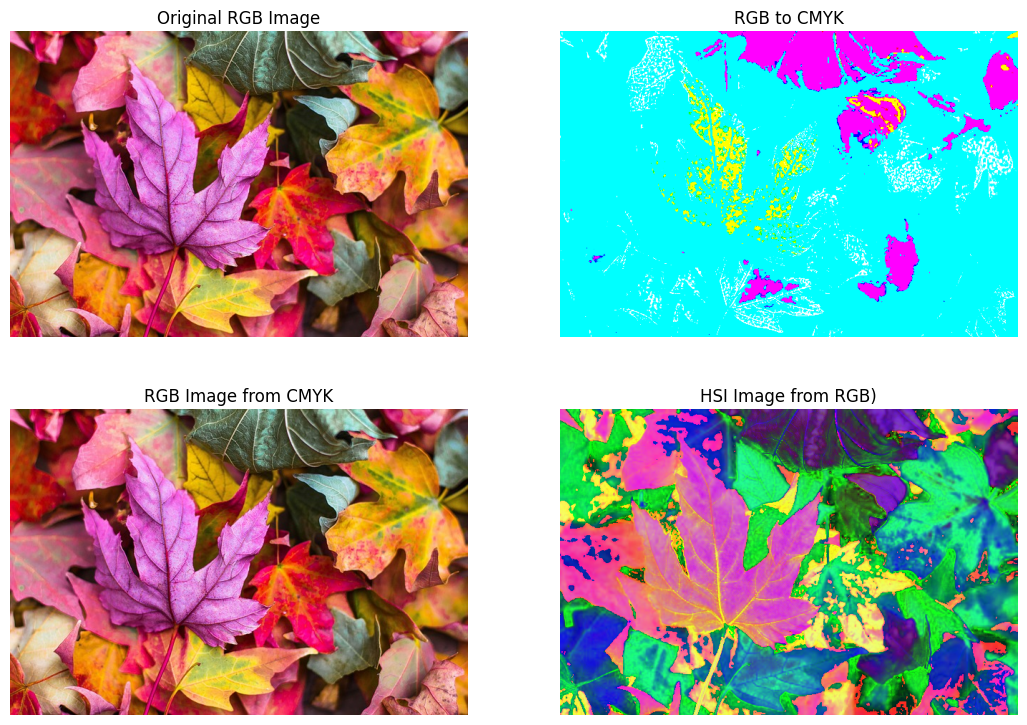

In [10]:
# RGB to CMYK
cmyk_image = np.zeros((image.shape[0], image.shape[1], 4), dtype=np.float32)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        r, g, b = image[i, j]
        c, m, y, k = RGB_to_CMYK(r, g, b)
        cmyk_image[i, j] = [c, m, y, k]

# CMYK back to RGB
cmyk_image_rgb = np.zeros_like(image, dtype=np.uint8)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        c, m, y, k = cmyk_image[i, j]
        r, g, b = CMYK_to_RGB(c, m, y, k)
        cmyk_image_rgb[i, j] = [r, g, b]

# RGB to HSI
hsi_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.float32)
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        r, g, b = image[y, x]
        h, s, i = RGB_to_HSI(r, g, b)
        hsi_image[y, x] = [h, s, i]

# Normalizing hue to [0, 1]
hsi_image[..., 0] = hsi_image[..., 0] / 360

# showing the images
plt.figure(figsize=(13, 9))

plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('Original RGB Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cmyk_image)
plt.title('RGB to CMYK')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cmyk_image_rgb)
plt.title('RGB Image from CMYK')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(hsi_image)
plt.title('HSI Image from RGB)')
plt.axis('off')

plt.show()

# Q2

## Read images

In [11]:
image2 = cv2.imread('images/2.jpg')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

array([[[18, 14, 29],
        [15, 21, 37],
        [ 5, 31, 48],
        ...,
        [ 0, 13, 16],
        [ 7, 16, 11],
        [ 7, 19,  9]],

       [[13,  9, 24],
        [14, 20, 36],
        [10, 36, 53],
        ...,
        [ 0, 14, 17],
        [ 7, 16, 11],
        [ 7, 19,  9]],

       [[ 8,  4, 19],
        [12, 18, 34],
        [11, 37, 54],
        ...,
        [ 0, 14, 17],
        [ 7, 16, 11],
        [ 7, 19,  9]],

       ...,

       [[ 9,  7,  8],
        [ 1,  6,  9],
        [ 1, 24, 30],
        ...,
        [17, 16, 14],
        [21, 20, 18],
        [22, 21, 19]],

       [[ 9,  7,  8],
        [ 1,  6,  9],
        [ 3, 23, 30],
        ...,
        [17, 16, 14],
        [21, 20, 18],
        [22, 21, 19]],

       [[ 9,  7,  8],
        [ 1,  6,  9],
        [ 3, 23, 30],
        ...,
        [17, 16, 14],
        [21, 20, 18],
        [22, 21, 19]]], dtype=uint8)
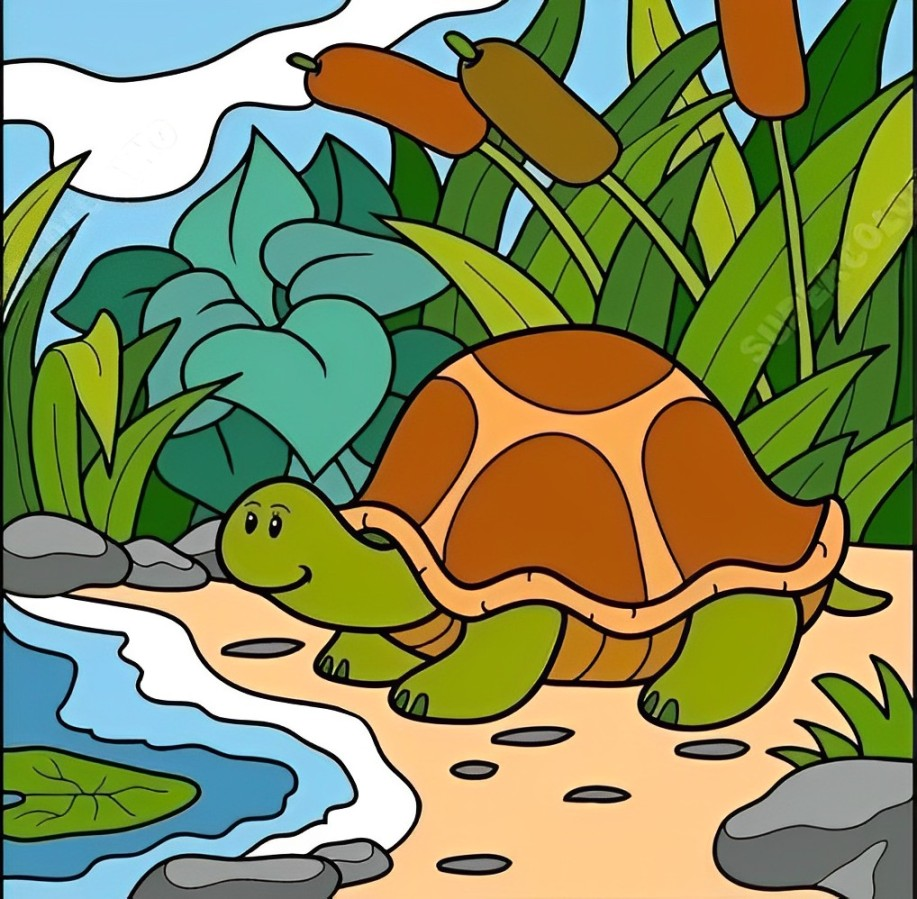

In [12]:
image2

In [13]:
image3 = cv2.imread('images/3.jpg')
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

array([[[21, 21, 21],
        [ 8,  8,  8],
        [ 0,  0,  0],
        ...,
        [ 0,  2,  6],
        [11, 19, 22],
        [16, 25, 32]],

       [[16, 16, 16],
        [11, 11, 11],
        [ 1,  1,  1],
        ...,
        [ 0,  4,  8],
        [18, 26, 29],
        [12, 21, 28]],

       [[ 1,  1,  1],
        [ 9,  9,  9],
        [ 6,  6,  6],
        ...,
        [ 6, 11, 15],
        [31, 39, 42],
        [10, 19, 26]],

       ...,

       [[32, 38, 34],
        [34, 40, 40],
        [19, 22, 29],
        ...,
        [15, 15, 15],
        [26, 26, 26],
        [27, 27, 27]],

       [[37, 43, 39],
        [39, 45, 45],
        [20, 24, 33],
        ...,
        [14, 14, 14],
        [27, 27, 27],
        [29, 29, 29]],

       [[38, 44, 40],
        [39, 45, 45],
        [21, 25, 34],
        ...,
        [14, 14, 14],
        [27, 27, 27],
        [29, 29, 29]]], dtype=uint8)
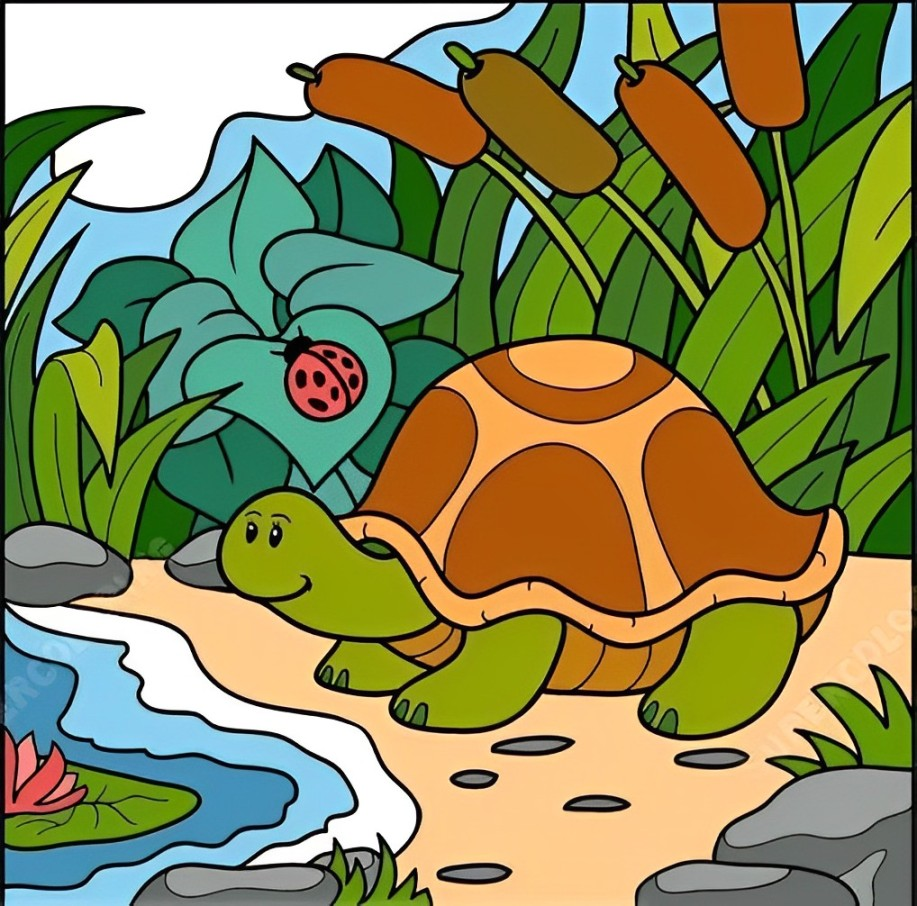

In [14]:
image3

## Find differences between two pictures

In [15]:
def diff (image1, image2):

  #############
  # Your code #
  #############
  # Resizing images in order to have the same dimensions
  image1_resized = cv2.resize(image1, (image2.shape[1], image2.shape[0]))

  # Computing absolute difference
  diff_image = cv2.absdiff(image1_resized, image2)

  # Creating a mask for unchanged pixels
  mask = np.all(diff_image == 0, axis=-1)

  # Setting color of unchanged pixels to black
  diff_image[mask] = [0, 0, 0]

  return diff_image

## Show result

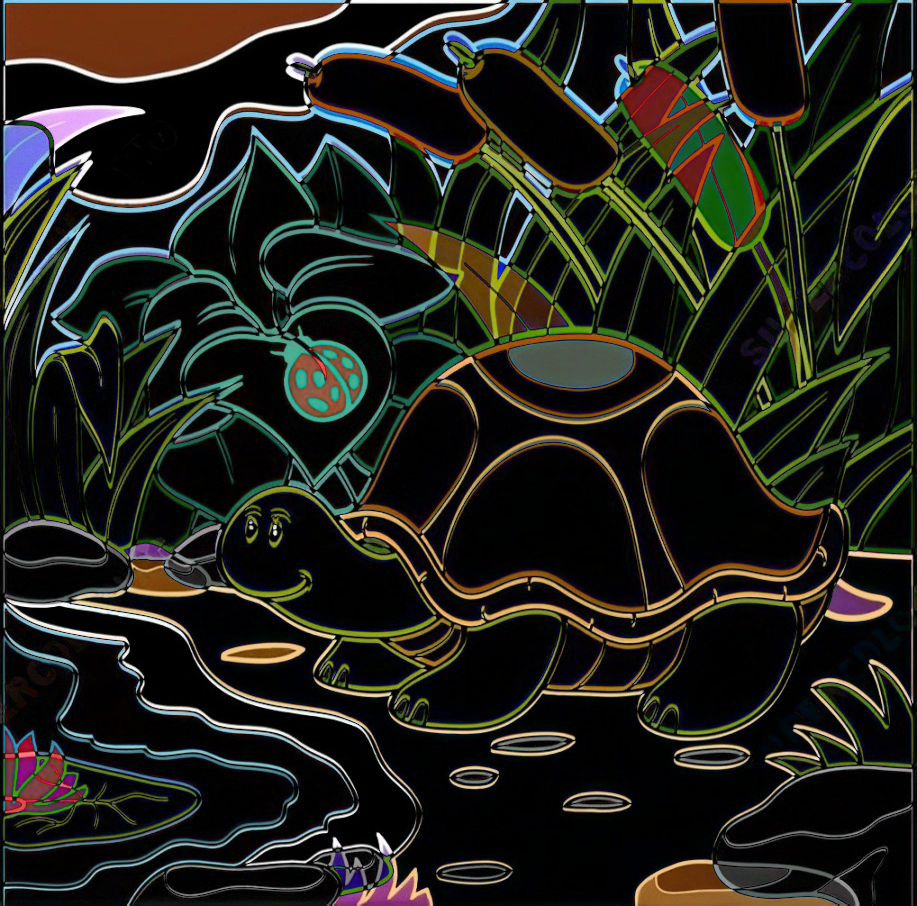

In [16]:
from google.colab.patches import cv2_imshow

# Find differences
result = diff(image2, image3)

# Display result
cv2_imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
cv2.waitKey(0)
cv2.destroyAllWindows()